#1. Load libraries and read data


## 1.1 Load Libraries

In [161]:
# Importing required libraries.
#Data Analysis
import pandas as pd
import numpy as np
#visualisation
import seaborn as sns 
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
#ANOVA Tests
from scipy import stats
from scipy.stats import ttest_ind
!pip install bioinfokit
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from bioinfokit.analys import get_data, stat
#Multipler Linera Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics




##1.2 Read Data

In [162]:
# Read Data frame
df = pd.read_csv("diabetes.csv")


#2. Overview & Data Cleaning


## 2.1 Check Head and Tail

In [163]:
#display the top 5 rows
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [164]:
#Display the bottom 5 rows
df.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

## 2.2 Data Information & Descriptive Statistics

In [165]:
#Check the data type, number of rows and columns, and the presence of null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [166]:
#Descriptive Statistics
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [167]:
# Check the number of each outcome (0 = Healthy, 1 = Diabetic)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## 2.3 Check Duplicates

In [168]:
#Check if there is any duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


## 2.4 Check Null Data

In [169]:
#Check if there is any null data
df. isnull().values.any()

False

## 2.5 Check Outliers

In [170]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

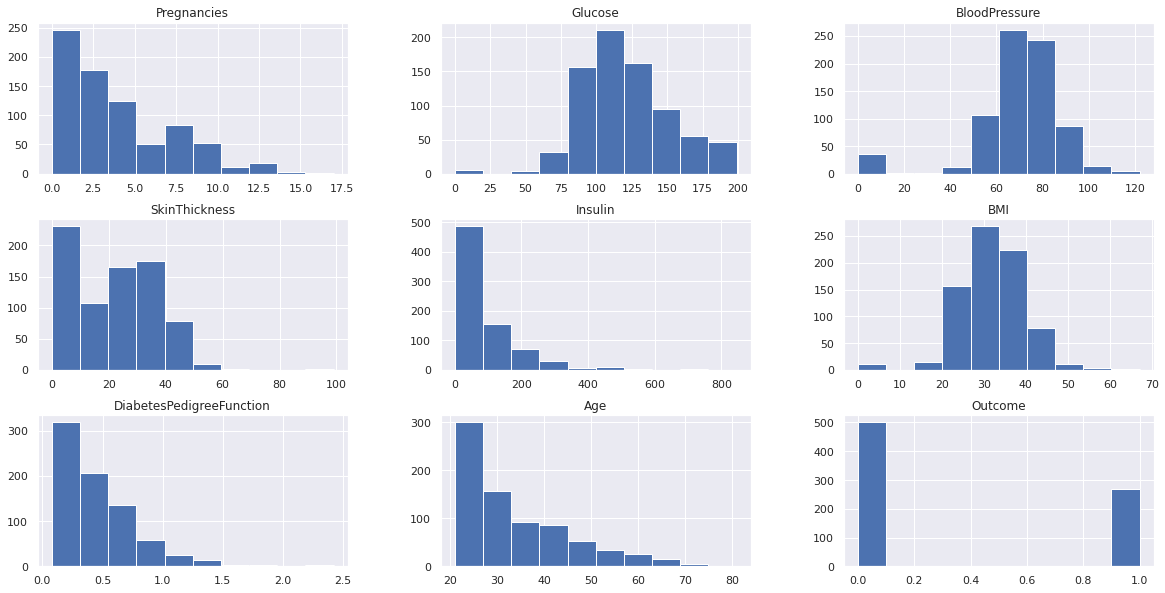

In [171]:
#Visualize the distribution with histograms.
#Set the figure size
plt.rcParams["figure.figsize"] = (20,10)
df.hist()
plt.show()


##2.6 Dealing with Missing Data

In [172]:
# Although there is no null value, from the descriptive statistics, we can see that there are some zero values when there shouldn't be.
# Now we will look at the dataset to find "0."
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [173]:
# Variables such as Glucose, Blood Pressure, SkinThickness, Insulin, and BMI should not be zeroes for a living human organism.
# This indicates missing value.
zero_columns = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = df['Glucose'].count()

for column in zero_columns:
    zero_count = df[df[column]==0][column].count()
    print('Number of cases with a value of 0 in {0} is {1}, Percentage is {2:.2f} %'.format(column, zero_count, 100*zero_count/total_count))

Number of cases with a value of 0 in Glucose is 5, Percentage is 0.65 %
Number of cases with a value of 0 in BloodPressure is 35, Percentage is 4.56 %
Number of cases with a value of 0 in SkinThickness is 227, Percentage is 29.56 %
Number of cases with a value of 0 in Insulin is 374, Percentage is 48.70 %
Number of cases with a value of 0 in BMI is 11, Percentage is 1.43 %


In [174]:
# We first replace 0 value by NaN

zero_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for variable in zero_columns:
  df[variable] = df[variable].replace (0, np.NaN)



In [175]:
#Does the mean of each variables is significantly different based on the outcome?
df_healthy = df[df["Outcome"] == 0]
df_diabetic = df[df["Outcome"] == 1]

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"]
for var in columns:
  tstat, pvalue = stats.ttest_ind(df_healthy[var], df_diabetic[var], nan_policy='omit')
  print(var, "T-Stat, P-value", tstat,pvalue)
  if pvalue > 0.05:
    print('The values between diabetic and healthy people are not significantly different (fail to reject H0)')
    print("")
  else:
    print('The values between diabetic and healthy people are significantly different (reject H0)')
    print("")


Pregnancies T-Stat, P-value -6.298430550035151 5.065127298053476e-10
The values between diabetic and healthy people are significantly different (reject H0)

Glucose T-Stat, P-value -15.700907488875874 2.4782891993099835e-48
The values between diabetic and healthy people are significantly different (reject H0)

BloodPressure T-Stat, P-value -4.680835112808535 3.4051509015513165e-06
The values between diabetic and healthy people are significantly different (reject H0)

SkinThickness T-Stat, P-value -6.238134509661346 8.95994913429961e-10
The values between diabetic and healthy people are significantly different (reject H0)

Insulin T-Stat, P-value -6.305413052537889 7.754790500412536e-10
The values between diabetic and healthy people are significantly different (reject H0)

BMI T-Stat, P-value -9.07722131205247 9.545638087582014e-19
The values between diabetic and healthy people are significantly different (reject H0)

DiabetesPedigreeFunction T-Stat, P-value -4.88582646072744 1.25460701

Since the differences for each variable between healthy and diabetic people are statistically signficant, we will treat the dataset differently.

Now, let's examine the missing data from each dataset (healthy and diabetic) and replace them with either the mean or median depending on the distribution.

In [176]:
df_healthy_modified = df_healthy.copy()
df_diabetic_modified = df_diabetic.copy()

In [177]:
#Count of null data for the healthy people dataset
print("Healthy Null Value Count")
print(df_healthy_modified.isnull().sum())
print("")

#Count of null data for the diabetic people dataset
print("Diabetic Null Value Count")
print(df_diabetic_modified.isnull().sum())

Healthy Null Value Count
Pregnancies                   0
Glucose                       3
BloodPressure                19
SkinThickness               139
Insulin                     236
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Diabetic Null Value Count
Pregnancies                   0
Glucose                       2
BloodPressure                16
SkinThickness                88
Insulin                     138
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Missing Data - Glucose

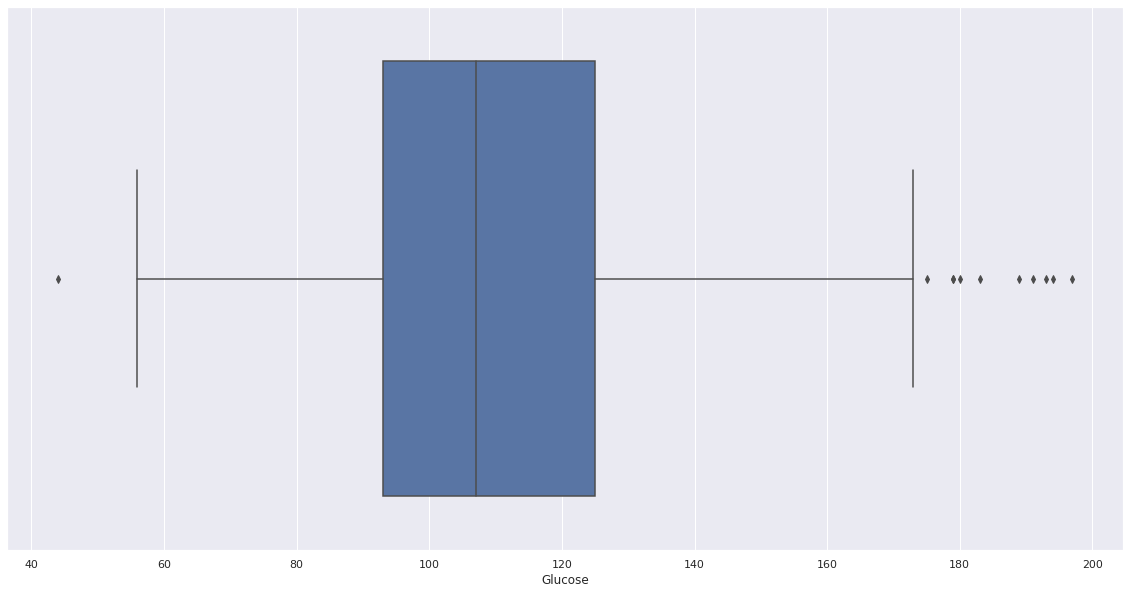

In [178]:
#Let's start with Glucose for healthy people
sns.boxplot(x=df_healthy_modified['Glucose'])

In [179]:
#Glucose (Healthy) has a few outliers. 
#So we will replace 0 with the median value.
df_healthy_modified["Glucose"] = df_healthy_modified["Glucose"].fillna(df_healthy_modified["Glucose"].median())


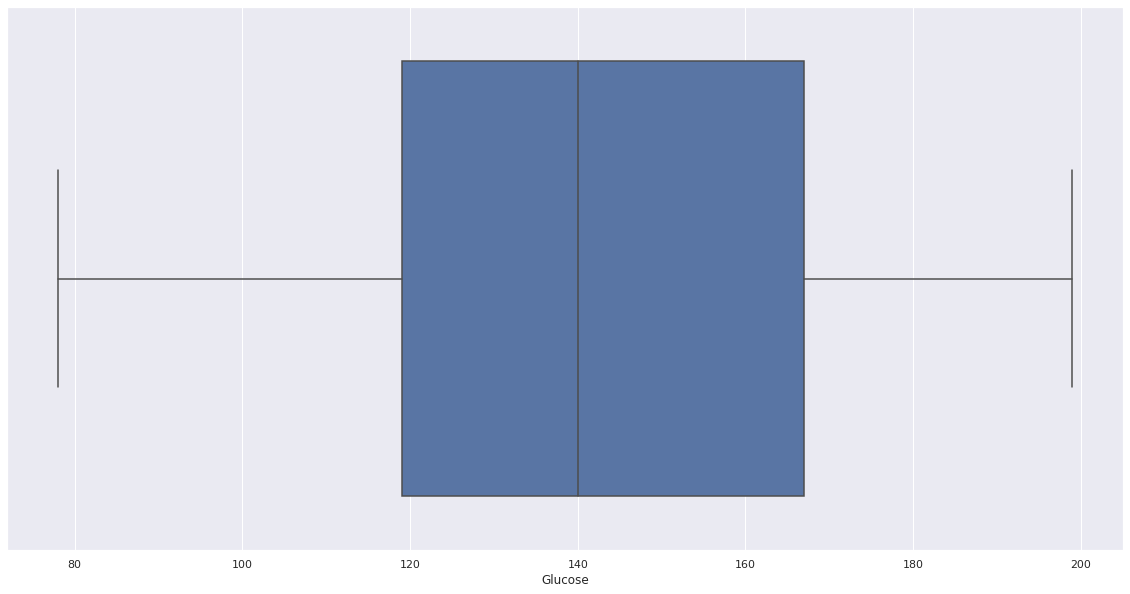

In [180]:
#Glucose for diabetic people
sns.boxplot(x=df_diabetic_modified['Glucose'])

In [181]:
#Glucose (diabetic) has no outliers. 
#So we will replace 0 with the mean value.

df_diabetic_modified["Glucose"] = df_diabetic_modified["Glucose"].fillna(df_diabetic_modified["Glucose"].mean())


Missing Data -  Blood Pressure

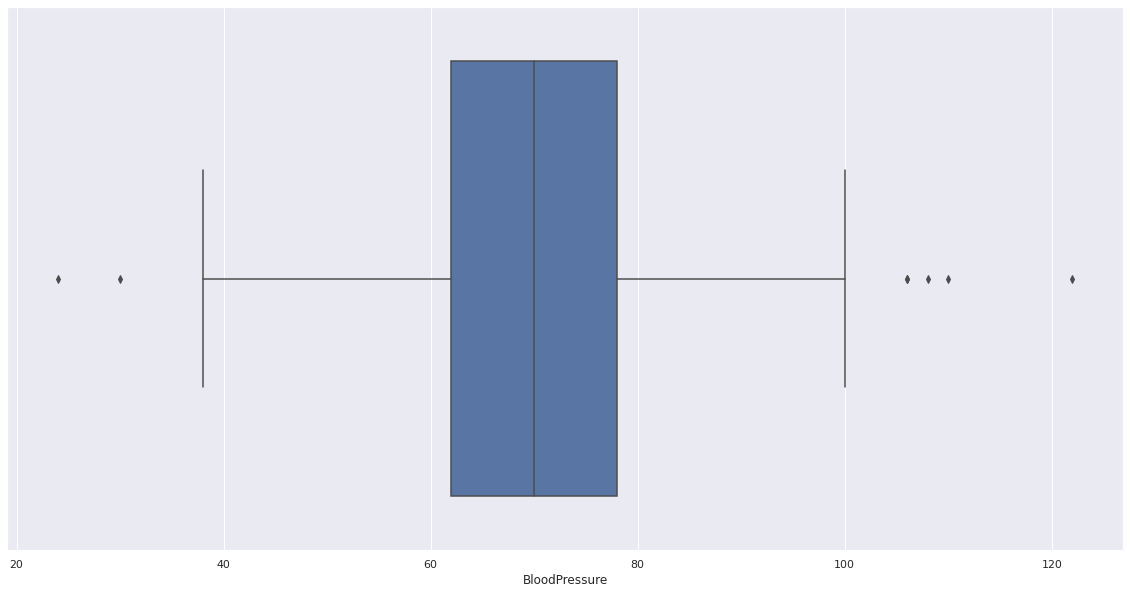

In [182]:
#Next is Blood Pressure for healthy people
sns.boxplot(x=df_healthy_modified['BloodPressure'])

In [183]:
#Blood Pressure (Healthy) has a few outliers. 
#So we will replace 0 with the median value.

df_healthy_modified["BloodPressure"] = df_healthy_modified["BloodPressure"].fillna(df_healthy_modified["BloodPressure"].median())


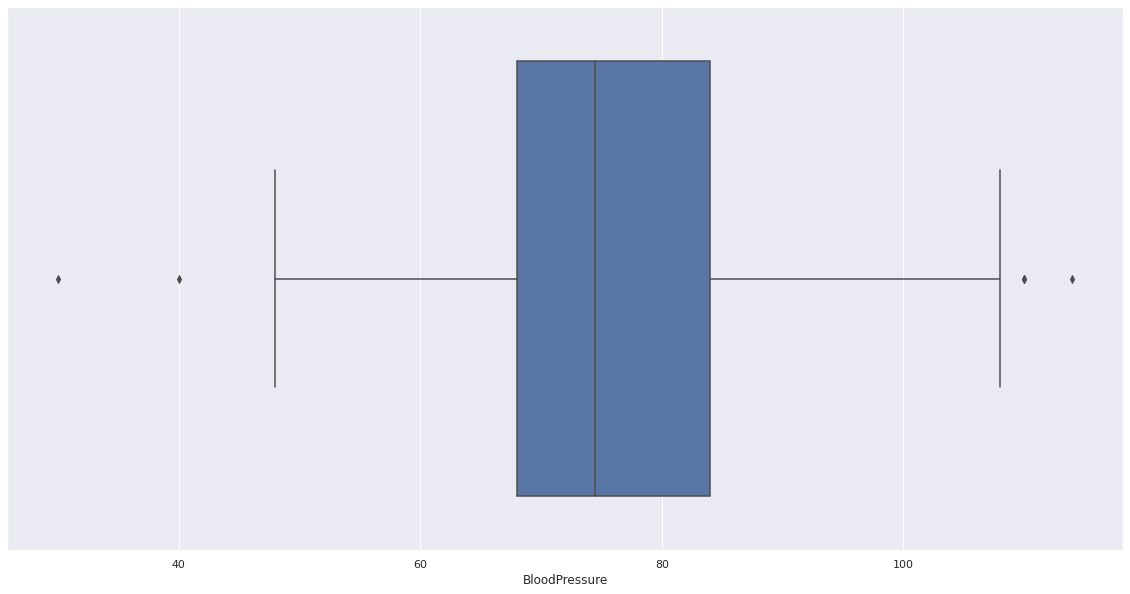

In [184]:
#Blood Pressure for diabetic people
sns.boxplot(x=df_diabetic_modified['BloodPressure'])

In [185]:
#Blood Pressure (diabetic) has a few outliers. 
#So we will replace 0 with the median value. 

df_diabetic_modified["BloodPressure"] = df_diabetic_modified["BloodPressure"].fillna(df_diabetic_modified["BloodPressure"].median())

Missing Data - Skin Thickness

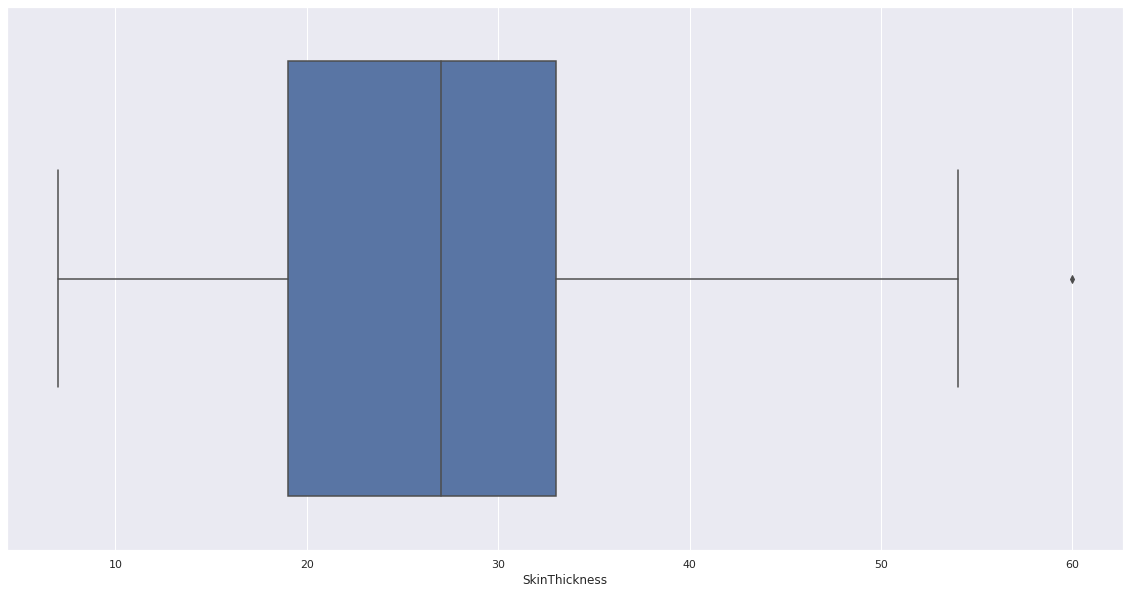

In [186]:
#Skin Thickness (healthy)
sns.boxplot(x=df_healthy_modified['SkinThickness'])

In [187]:
#Skin Thickness (healthy) has only one outliers. 
#So we will replace 0 with the mean value.


df_healthy_modified["SkinThickness"] = df_healthy_modified["SkinThickness"].fillna(df_healthy_modified["SkinThickness"].mean())


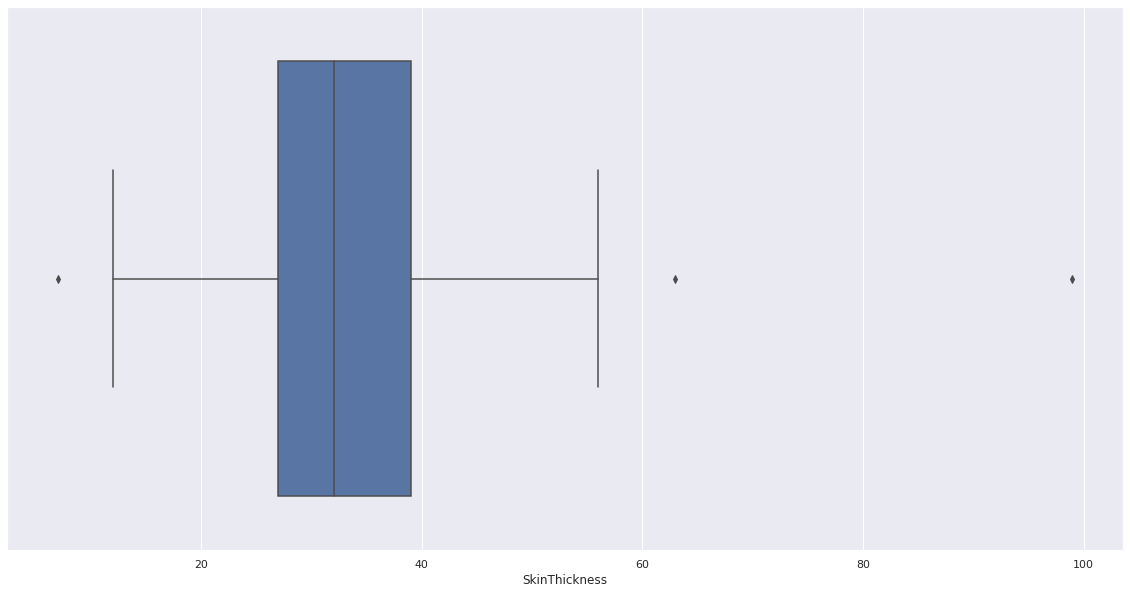

In [188]:
#Skin Thickness (diabetic)
sns.boxplot(x=df_diabetic_modified['SkinThickness'])

In [189]:
#Skin Thickness (diabetic) has a few outliers. 
#So we will replace 0 with the median value.

df_diabetic_modified["SkinThickness"] = df_diabetic_modified["SkinThickness"].fillna(df_diabetic_modified["SkinThickness"].median())


Missing Data - Insulin

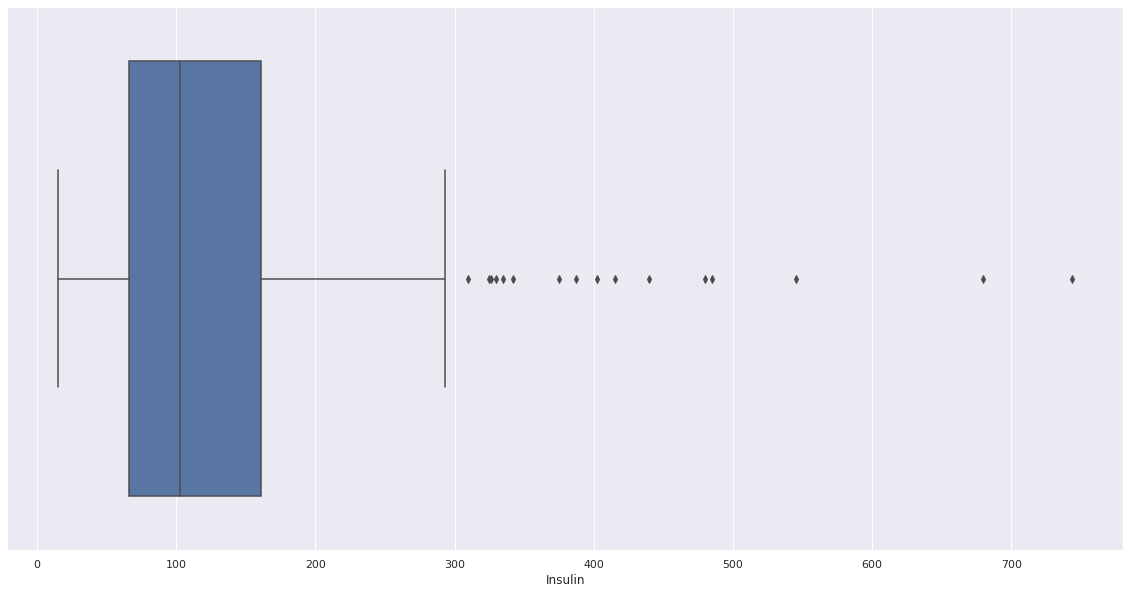

In [190]:
#Insulin (Healthy)
sns.boxplot(x=df_healthy_modified['Insulin'])


In [191]:
#Insulin (healthy) has many outliers. 
#So we will replace 0 with the median value.

df_healthy_modified["Insulin"] = df_healthy_modified["Insulin"].fillna(df_healthy_modified["Insulin"].median())


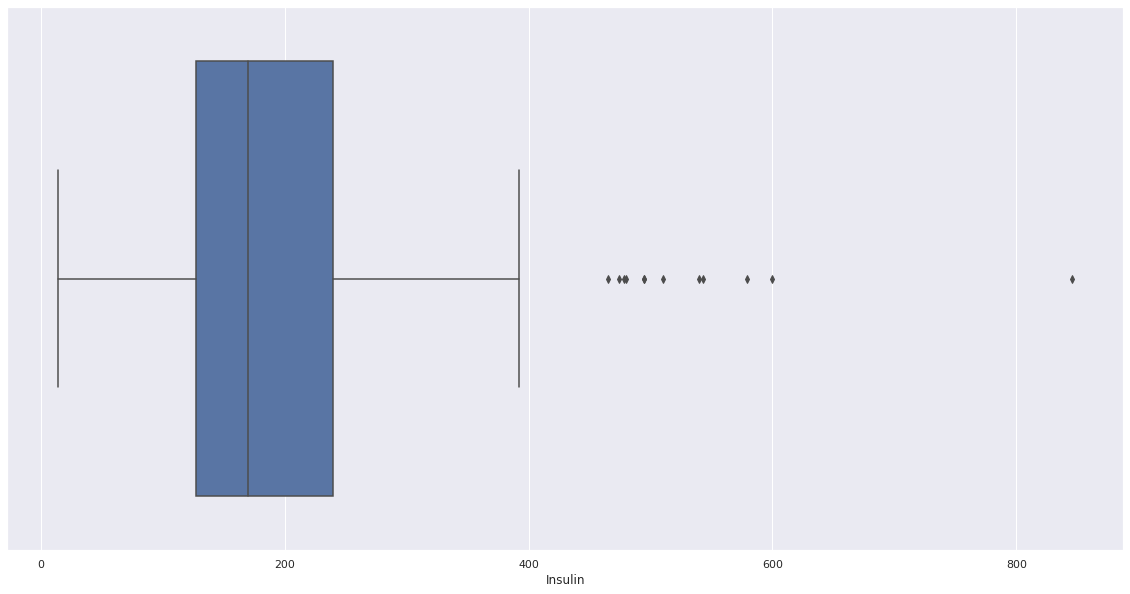

In [192]:
#Insulin (Diabetic)
sns.boxplot(x=df_diabetic_modified['Insulin'])

In [193]:
#Insulin (diabetic) has many outliers. 
#So we will replace 0 with the median value.

df_diabetic_modified["Insulin"] = df_diabetic_modified["Insulin"].fillna(df_diabetic_modified["Insulin"].median())


Missing Data - BMI

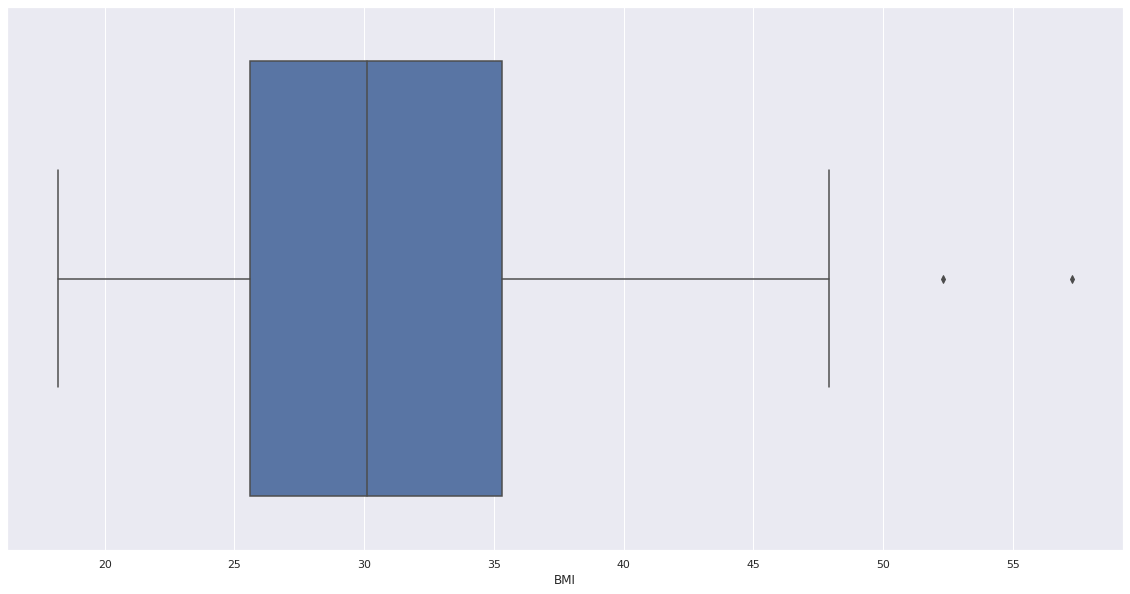

In [194]:
#BMI Healthy
sns.boxplot(x=df_healthy_modified['BMI'])

In [195]:
#BMI (healthy) has only 2 outliers
#We will replace missing values with meam.
df_healthy_modified["BMI"] = df_healthy_modified["BMI"].fillna(df_healthy_modified["BMI"].mean())

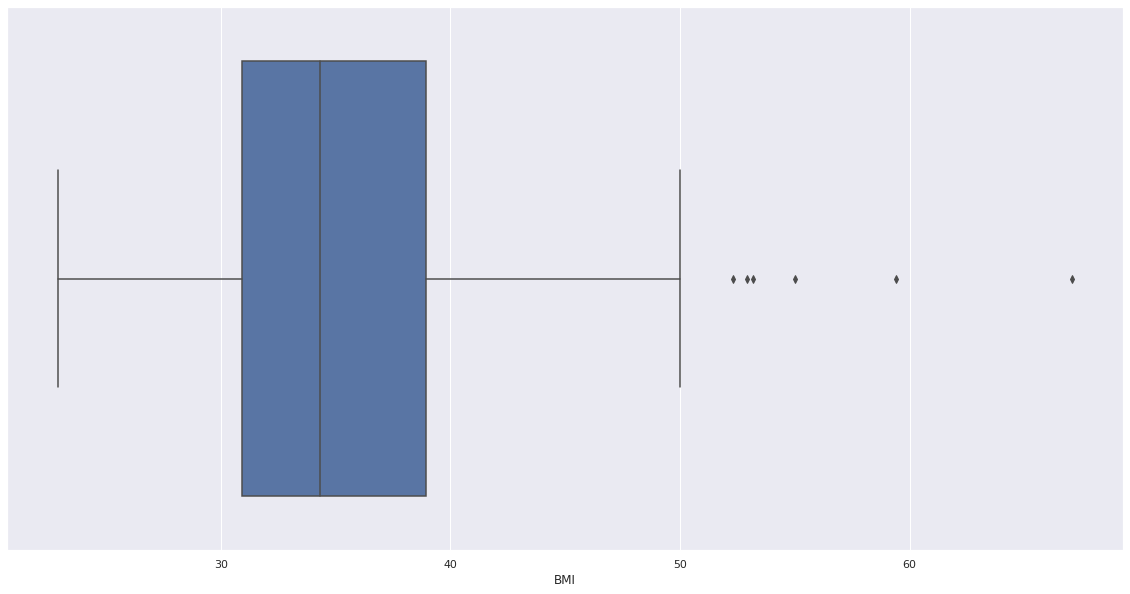

In [196]:
#BMI Diabetic
sns.boxplot(x=df_diabetic_modified['BMI'])

In [197]:
#BMI (diabetic) has many outliers
#We will replace missing values with meam.
df_diabetic_modified["BMI"] = df_diabetic_modified["BMI"].fillna(df_diabetic_modified["BMI"].mean())

In [198]:
#Count of null data for the healthy people dataset
print("Healthy Null Value Count")
print(df_healthy_modified.isnull().sum())
print("")

#Count of null data for the diabetic people dataset
print("Diabetic Null Value Count")
print(df_diabetic_modified.isnull().sum())

Healthy Null Value Count
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Diabetic Null Value Count
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [199]:
#Great! There's now no more null value.
#Before we move on, we will carry out a T-test to see if steps of handling missing values change the distribution so much that it is not statistically the same to the original data.
print("For Healthy People")
print("")
for var in zero_columns:
  tstat, pvalue = stats.ttest_ind(df_healthy[var], df_healthy_modified[var],nan_policy='omit')
  print(var, "T-Stat, P-value", tstat,pvalue)
  if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
  else:
    print('Samples are likely drawn from different distributions (reject H0)')
print("")
print("For Diabetic People")
print("")
for var in zero_columns:
  tstat, pvalue = stats.ttest_ind(df_diabetic[var], df_diabetic_modified[var],nan_policy='omit')
  print(var, "T-Stat, P-value", tstat,pvalue)
  if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
  else:
    print('Samples are likely drawn from different distributions (reject H0)')

For Healthy People

Glucose T-Stat, P-value 0.013951581375464884 0.9888714065807569
Samples are likely drawn from the same distributions (fail to reject H0)
BloodPressure T-Stat, P-value 0.04334419847766985 0.9654359975472652
Samples are likely drawn from the same distributions (fail to reject H0)
SkinThickness T-Stat, P-value 0.0 1.0
Samples are likely drawn from the same distributions (fail to reject H0)
Insulin T-Stat, P-value 2.0073550758359384 0.04506453339794913
Samples are likely drawn from different distributions (reject H0)
BMI T-Stat, P-value 0.0 1.0
Samples are likely drawn from the same distributions (fail to reject H0)

For Diabetic People

Glucose T-Stat, P-value 1.1115415481188491e-14 1.0
Samples are likely drawn from the same distributions (fail to reject H0)
BloodPressure T-Stat, P-value 0.04615349536753525 0.9632056956163338
Samples are likely drawn from the same distributions (fail to reject H0)
SkinThickness T-Stat, P-value 0.36796234681572965 0.713075876127947
Samp

Except for insulin data for healthy people, the way we handled missing values did not change the distribution in a statistically significnat way.

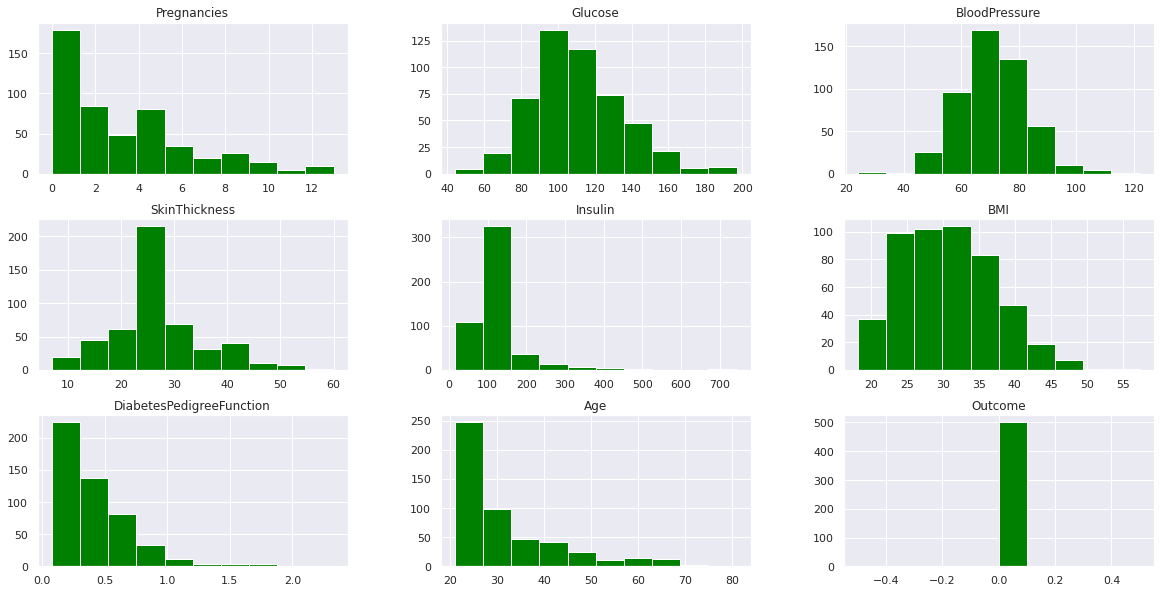

In [200]:
#Visualize Healthy people data distribution with histograms.
#Set the figure size
plt.rcParams["figure.figsize"] = (20,10)
df_healthy_modified.hist(color = "green")
plt.show()


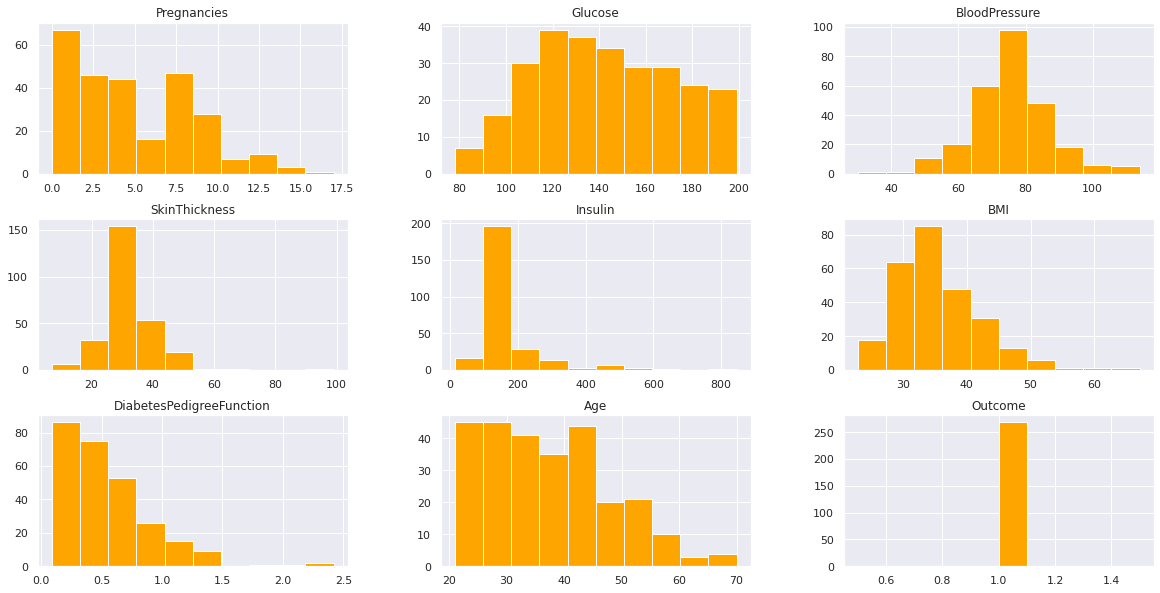

In [201]:
#Visualize Diabetic people data distribution with histograms.
#Set the figure size
plt.rcParams["figure.figsize"] = (20,10)
df_diabetic_modified.hist(color = "orange")
plt.show()

## 2.7 Dealing with Outliers using the IQR Method

In [202]:
#Creeate a function that caps the upper limit and floors the lower limit
#Reference: rachiitoshniwal on github

def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))



In [203]:
outliers_columns = ["Glucose","Insulin","BMI", "DiabetesPedigreeFunction", "Pregnancies"]
iqr_capping(df_healthy_modified, outliers_columns, 1.5)
iqr_capping(df_diabetic_modified, outliers_columns, 1.5)

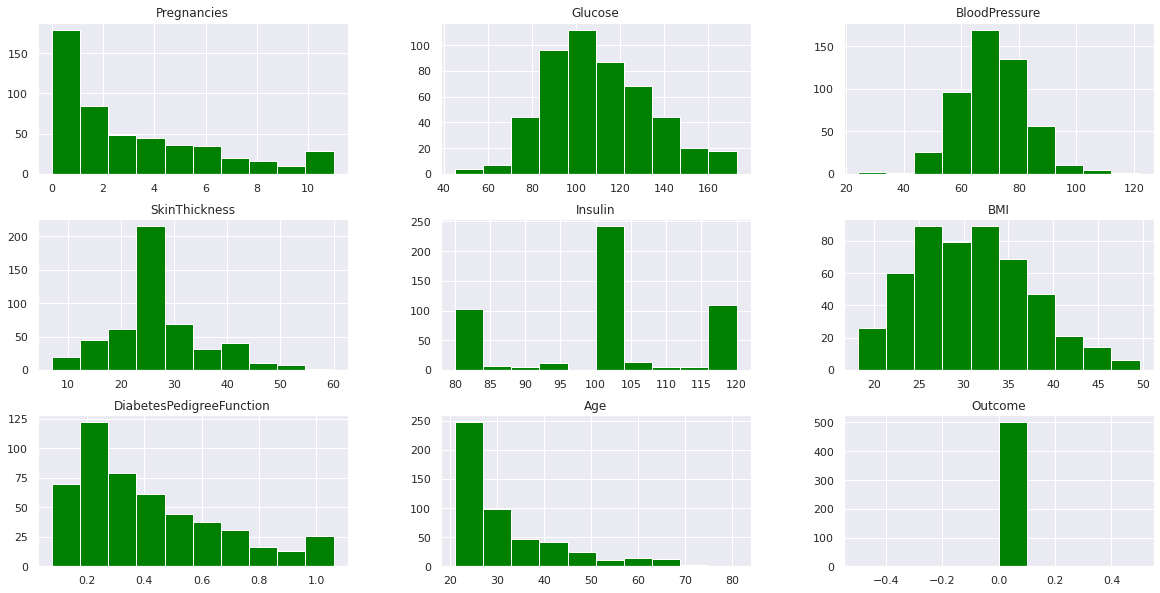

In [204]:
#Visualize Healthy people data distribution with histograms.
#Set the figure size
plt.rcParams["figure.figsize"] = (20,10)
df_healthy_modified.hist(color = "green")
plt.show()

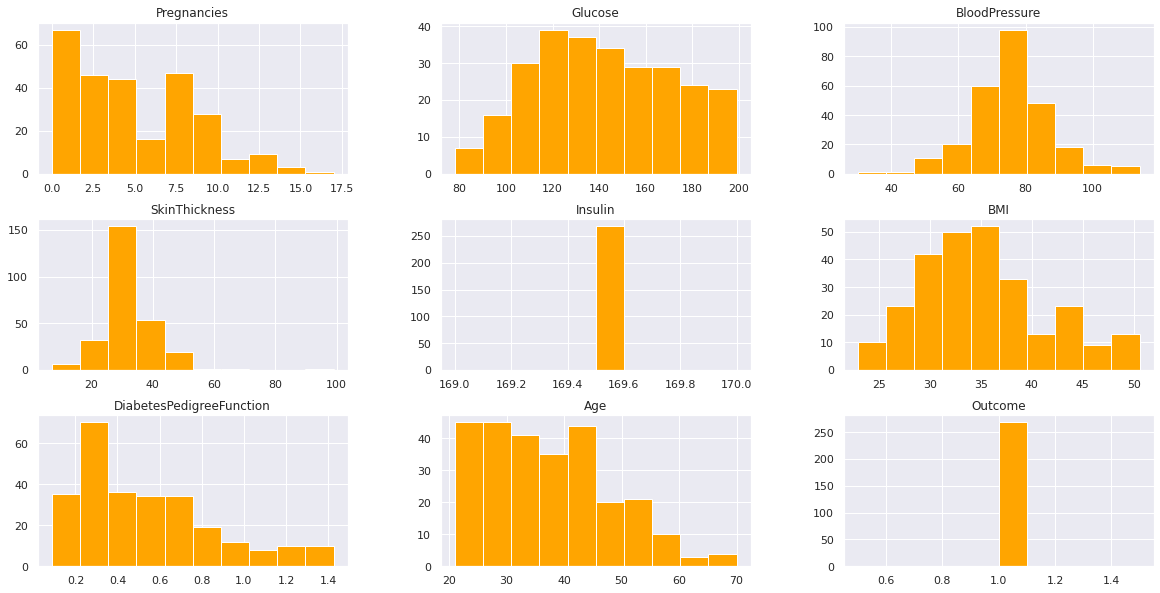

In [205]:
#Visualize diabetic people data distribution with histograms.
#Set the figure size
plt.rcParams["figure.figsize"] = (20,10)
df_diabetic_modified.hist(color = "orange")
plt.show()

In [206]:
frames = [df_healthy_modified, df_diabetic_modified]
joint_df = pd.concat(frames)
joint_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.825521  121.515155      72.389323      29.132459  125.148438   
std       3.322834   30.129365      12.106039       8.881247   34.223498   
min       0.000000   45.000000      24.000000       7.000000   80.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  110.000000   
75%       6.000000  141.000000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  169.500000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.385580                  0.458889   33.240885    0.348958  
std      6.674149                  0.287185   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     50.587500                  1.426250   81.000000    1.000000

## 2.8 Grouping Age into a categorical variable

Text(0, 0.5, 'Count')

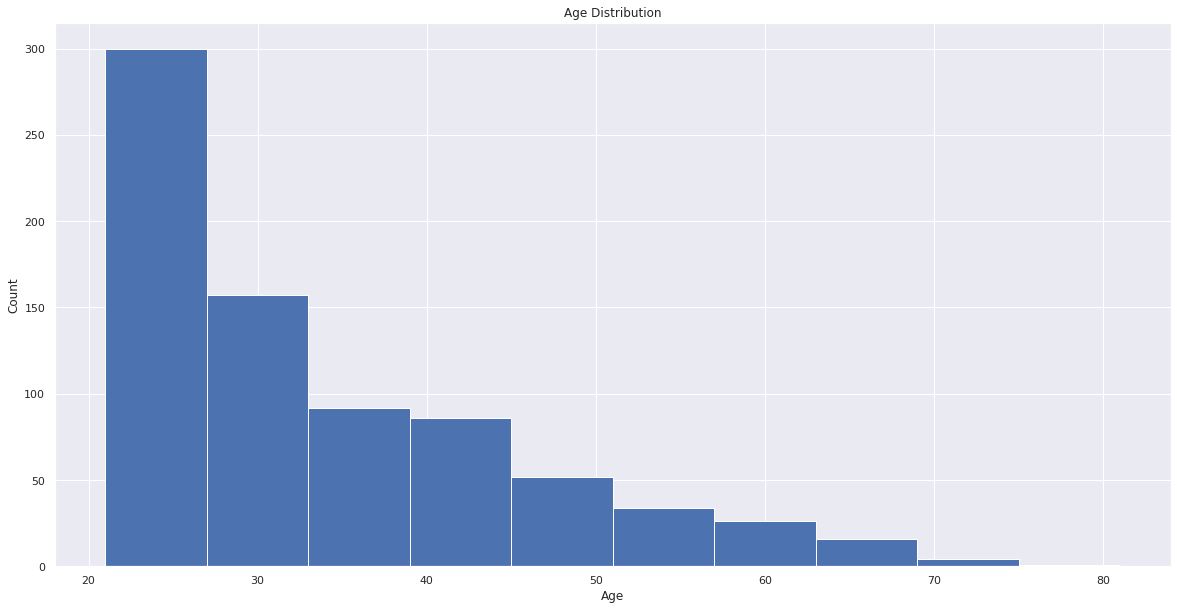

In [207]:
#Let's see the distribution of the age column
plt.hist(joint_df["Age"])
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count')

In [208]:
joint_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.825521  121.515155      72.389323      29.132459  125.148438   
std       3.322834   30.129365      12.106039       8.881247   34.223498   
min       0.000000   45.000000      24.000000       7.000000   80.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  110.000000   
75%       6.000000  141.000000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  169.500000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.385580                  0.458889   33.240885    0.348958  
std      6.674149                  0.287185   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     50.587500                  1.426250   81.000000    1.000000

In [209]:
# we will create a new column and assign a new age category 
# the three age categories are: "44 year-old or below", "45 - 64 year-old", "65 and above" 
# the categories are based the groupings from the  CDC National Diabete Statistic Report

joint_df["AgeCategories"] = np.where(joint_df['Age'] >= 65, "65 year-old and above",
                                 np.where(joint_df['Age'] <= 44, "44 year-old and below", "45 - 64 year-old"  ))

joint_df.tail()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
755          1.0    128.0           88.0           39.0    169.5  36.5   
757          0.0    123.0           72.0           32.0    169.5  36.3   
759          6.0    190.0           92.0           32.0    169.5  35.5   
761          9.0    170.0           74.0           31.0    169.5  44.0   
766          1.0    126.0           60.0           32.0    169.5  30.1   

     DiabetesPedigreeFunction  Age  Outcome          AgeCategories  
755                     1.057   37        1  44 year-old and below  
757                     0.258   52        1       45 - 64 year-old  
759                     0.278   66        1  65 year-old and above  
761                     0.403   43        1  44 year-old and below  
766                     0.349   47        1       45 - 64 year-old

In [210]:
joint_df['AgeCategories'].value_counts()

44 year-old and below    635
45 - 64 year-old         117
65 year-old and above     16
Name: AgeCategories, dtype: int64

#3. Visualization and Exploratory Analysis

Test the effect of different age group on the Blood pressure for diabetic and healthy people

##3.1 Histogram

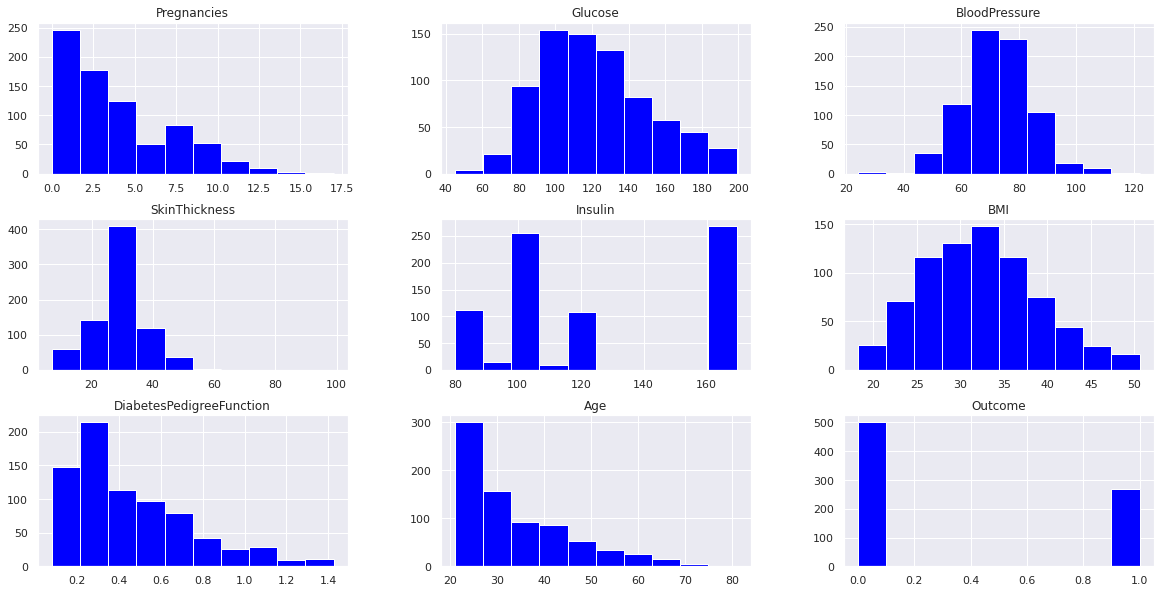

In [211]:
#Visualize data distribution with histograms.
#Set the figure size
plt.rcParams["figure.figsize"] = (20,10)
joint_df.hist(color = "blue")
plt.show()

##3.2 Boxplot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Blood Pressure (mmHg)')

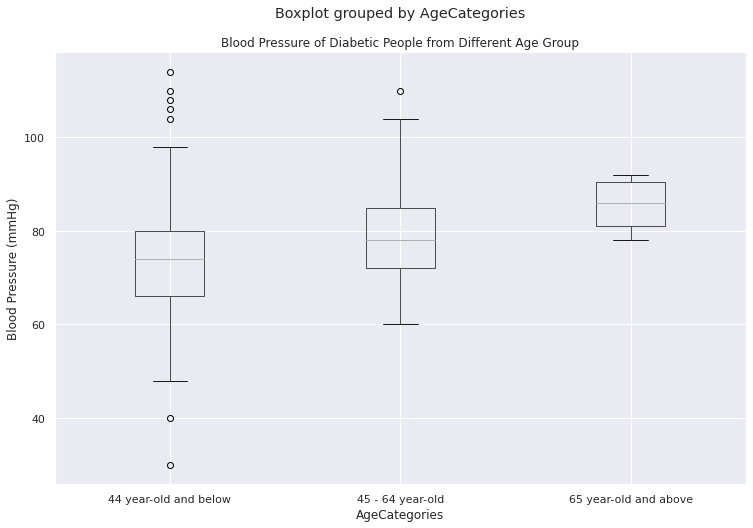

In [212]:
#Divide the dateframe into diabetic and healthy
diabetic = joint_df[joint_df["Outcome"] == 1]
healthy = joint_df[joint_df["Outcome"] == 0]

#Visualize the Blood Pressure distribution for diabetic people with boxplots
diabetic.boxplot('BloodPressure',by = 'AgeCategories', figsize = (12,8))
plt.title("Blood Pressure of Diabetic People from Different Age Group")
plt.ylabel("Blood Pressure (mmHg)")


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Blood Pressure (mmHg)')

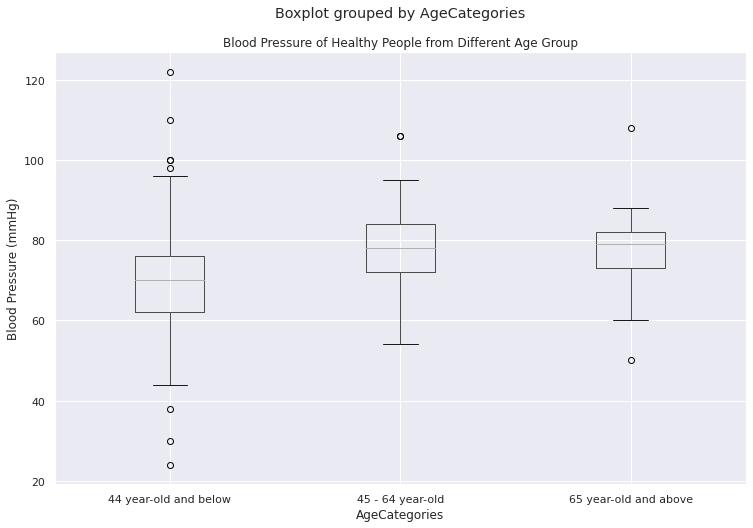

In [213]:
#Visualize the Blood Pressure distribution for healthy people with boxplots
healthy.boxplot('BloodPressure',by = 'AgeCategories', figsize = (12,8))
plt.title("Blood Pressure of Healthy People from Different Age Group")
plt.ylabel("Blood Pressure (mmHg)")


##3.3 Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

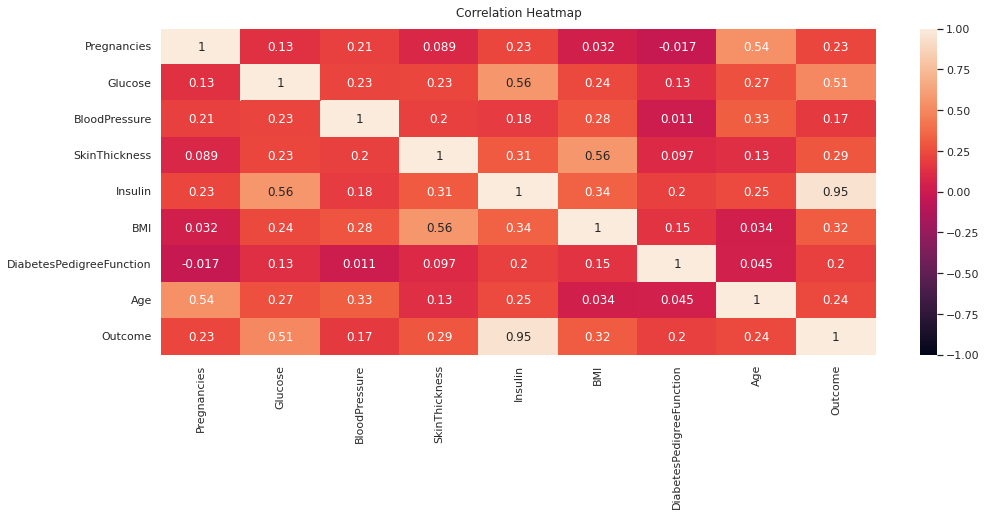

In [214]:
#Visualize the correlation with a Heatmap
plt.figure(figsize= (16,6))
heatmap = sns.heatmap(joint_df.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 12}, pad = 12)

#4 Modelling

## 4.1 Anova
Code is referenced from INF 2178 Lecture (Mar 14th) [Class Demo Notebook](https://github.com/shionguha/inf2178h-w22-exp-design-datascience/blob/main/notebooks/class-demo-mar7.ipynb)

###4.1.1 Test

In [215]:
#Conduct ANOVA Test
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('BloodPressure ~ C(AgeCategories) + C(Outcome) + C(AgeCategories):C(Outcome)', data=joint_df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                                    sum_sq     df          F        PR(>F)
C(AgeCategories)               6458.309349    2.0  24.080360  7.231419e-11
C(Outcome)                     2179.386807    1.0  16.252061  6.102274e-05
C(AgeCategories):C(Outcome)     345.120225    2.0   1.286810  2.767496e-01
Residual                     102183.518098  762.0        NaN           NaN


In [216]:
# ANOVA table using bioinfokit 
res = stat()
res.anova_stat(df=joint_df, res_var='BloodPressure', anova_model='BloodPressure ~ C(AgeCategories) + C(Outcome) + C(AgeCategories):C(Outcome)')
res.anova_summary

df         sum_sq      mean_sq          F  \
C(AgeCategories)               2.0    6458.309349  3229.154675  24.080360   
C(Outcome)                     1.0    2179.386807  2179.386807  16.252061   
C(AgeCategories):C(Outcome)    2.0     345.120225   172.560112   1.286810   
Residual                     762.0  102183.518098   134.099105        NaN   

                                   PR(>F)  
C(AgeCategories)             7.231419e-11  
C(Outcome)                   6.102274e-05  
C(AgeCategories):C(Outcome)  2.767496e-01  
Residual                              NaN

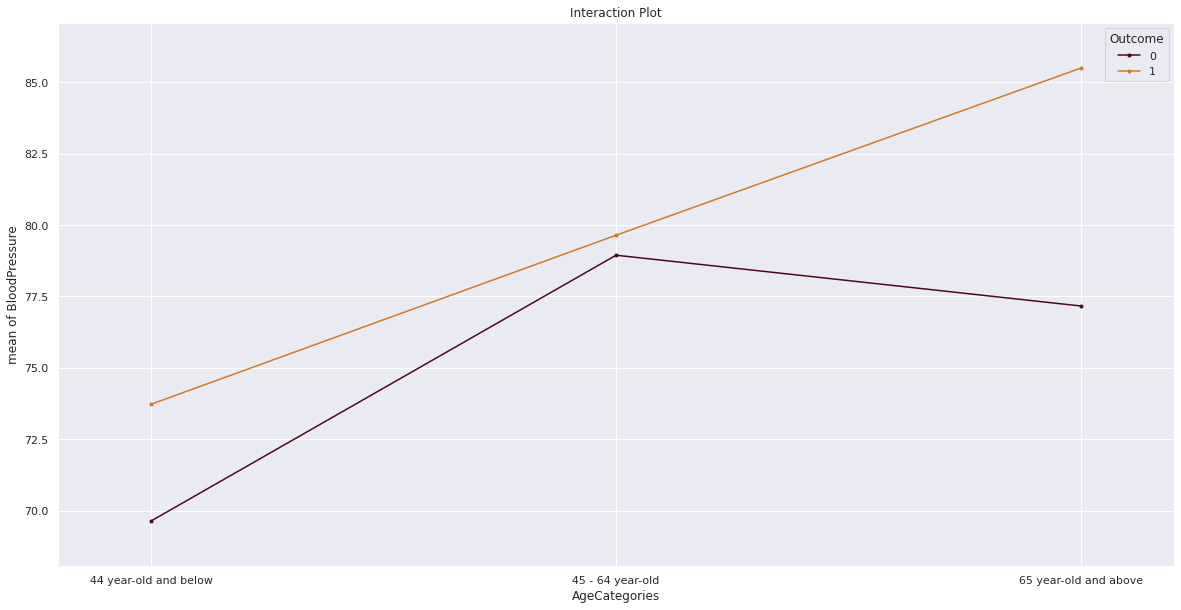

In [217]:
#Visualize the Interaction Plot

fig = interaction_plot(x=joint_df['AgeCategories'], trace=joint_df['Outcome'], response=joint_df['BloodPressure'], 
    colors=['#4c061d','#d17a22'])
plt.title("Interaction Plot")
plt.show()


### 4.1.2 Post Hoc Test

In [218]:
#Post-Hoc Test - Tukey HSD
#For Main effect AgeCategories
res = stat()
res.tukey_hsd(df=joint_df, res_var='BloodPressure', xfac_var='AgeCategories', anova_model='BloodPressure ~ C(AgeCategories) + C(Outcome) + C(AgeCategories):C(Outcome)')
res.tukey_summary





/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1                 group2      Diff     Lower  \
0  44 year-old and below       45 - 64 year-old  8.376082  5.640146   
1  44 year-old and below  65 year-old and above  8.309843  1.426167   
2       45 - 64 year-old  65 year-old and above  0.066239 -7.182286   

       Upper    q-value   p-value  
0  11.112018  10.167492  0.001000  
1  15.193518   4.009140  0.013051  
2   7.314765   0.030349  0.900000

In [219]:
joint_df.groupby('AgeCategories')['BloodPressure'].mean()


AgeCategories
44 year-old and below    70.940157
45 - 64 year-old         79.316239
65 year-old and above    79.250000
Name: BloodPressure, dtype: float64

In [220]:
joint_df.groupby('AgeCategories')['BloodPressure'].std()

AgeCategories
44 year-old and below    11.902186
45 - 64 year-old         10.305380
65 year-old and above    13.102163
Name: BloodPressure, dtype: float64

In [221]:
joint_df.groupby('Outcome')['BloodPressure'].mean()

Outcome
0    70.844000
1    75.272388
Name: BloodPressure, dtype: float64

In [222]:
joint_df.groupby('Outcome')['BloodPressure'].std()

Outcome
0    11.928631
1    11.927232
Name: BloodPressure, dtype: float64

###4.1.3 Check Assumptions

Check ANOVA Assumption with QQ-plot, histograms, Shapiro-Wil Test, and Levene's Test.
Make sure there is a normal distribution of residuals and homogeneity of variances.

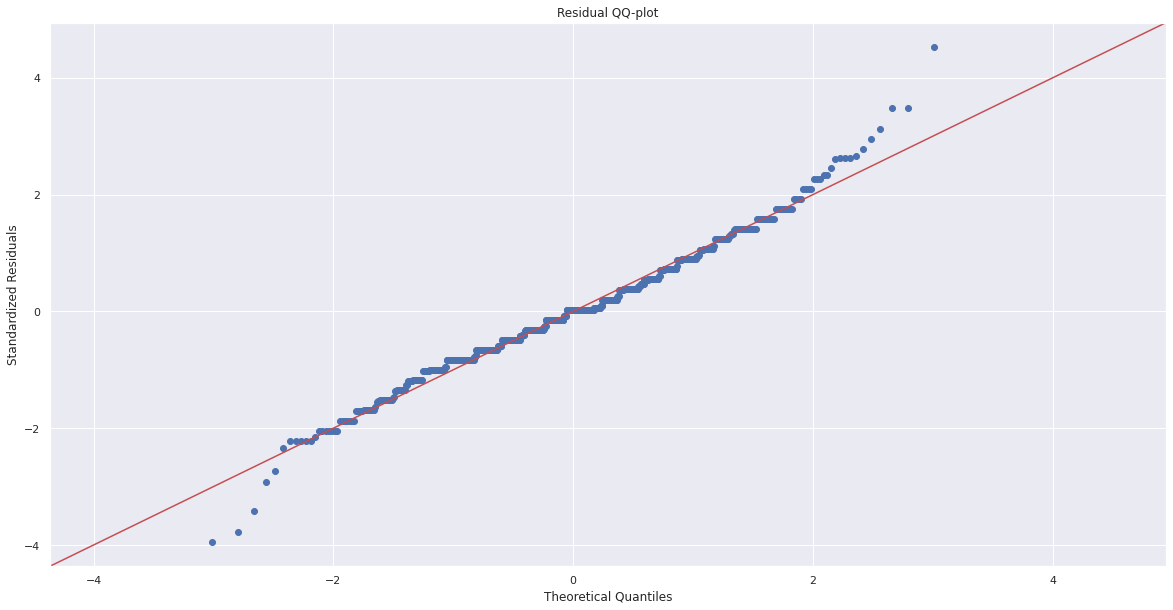

In [223]:
#Check residual distribution with QQ-Plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Residual QQ-plot")
plt.show()

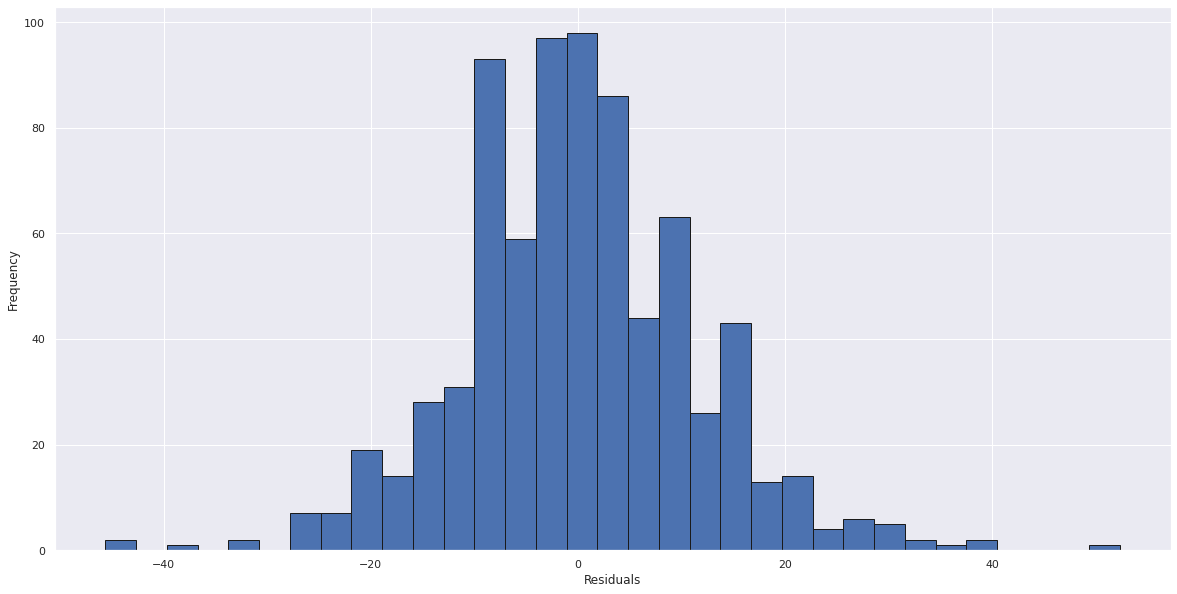

In [224]:
# Check Residual distribution with histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')

plt.show()

Standardized residuals lie around the 45-degree line. However, the the histogram distribution looks mostly normal, with a slight skew to the right. 

We will now use Shapiro-Wilk test to check the normal distribution of residuals. 


In [225]:
import scipy.stats as stats
w, pvalue = stats.shapiro(mod.resid)
print(w, pvalue)

0.9855520725250244 7.03660361978109e-07


Even though we rejected the Shapiro-Wilk test statistics (p < 0.05), we should consider the residual plots and histograms. In the residual plot, the standardized residuals lie around the 45 degree line, and the histogram shows a approximately normal distribution of residuals.



In [226]:
#Levene test to check the homogeneity of variances.
res = stat()
res.levene(df=joint_df, res_var='BloodPressure', xfac_var=['AgeCategories', 'Outcome'])
res.levene_summary

Parameter   Value
0      Test statistics (W)  0.5477
1  Degrees of freedom (Df)  5.0000
2                  p value  0.7402

As the p value (0.6) is not significant, we fail to reject the null hypothesis and conclude that samples have equal variances.

##4.2 Multiple Linear Regression


Use multiple linear regress to predict the plasma glucose concentration using BMI, age, and blood pressure. Code is referenced from INF 2178 Lecture (Mar 7th) [Class Demo Notebook](https://github.com/shionguha/inf2178h-w22-exp-design-datascience/blob/main/notebooks/class-demo-mar7.ipynb)

###4.2.1 Scatter Plot

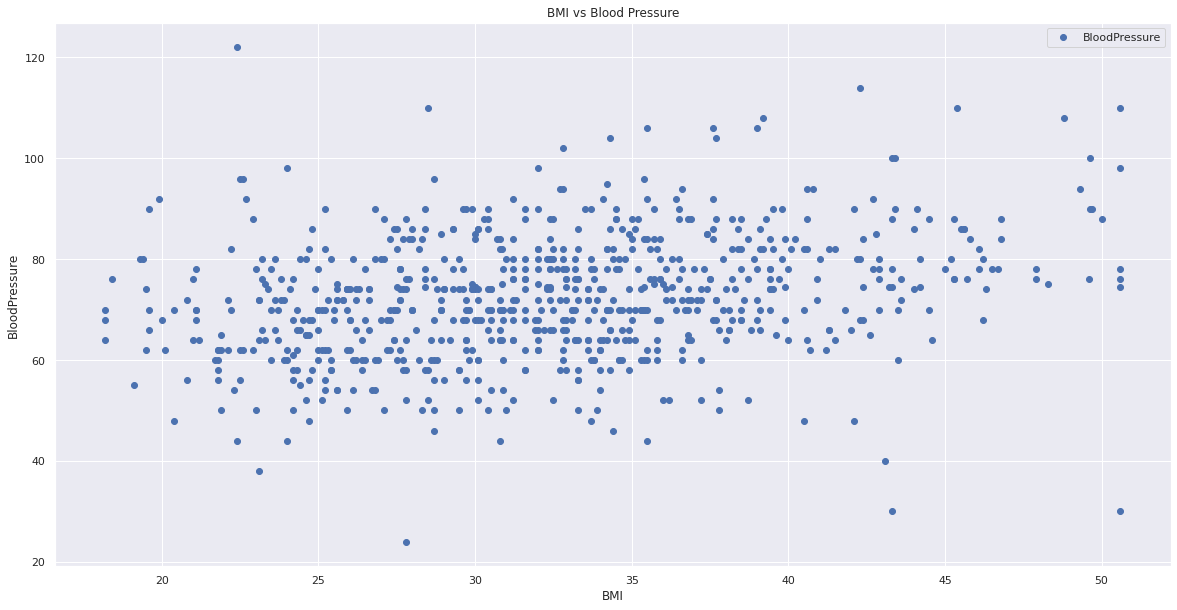

In [227]:
#Scatter Plot - BMI vs Blood Pressure
joint_df.plot(x='BMI', y='BloodPressure', style='o')
plt.title('BMI vs Blood Pressure')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.show()

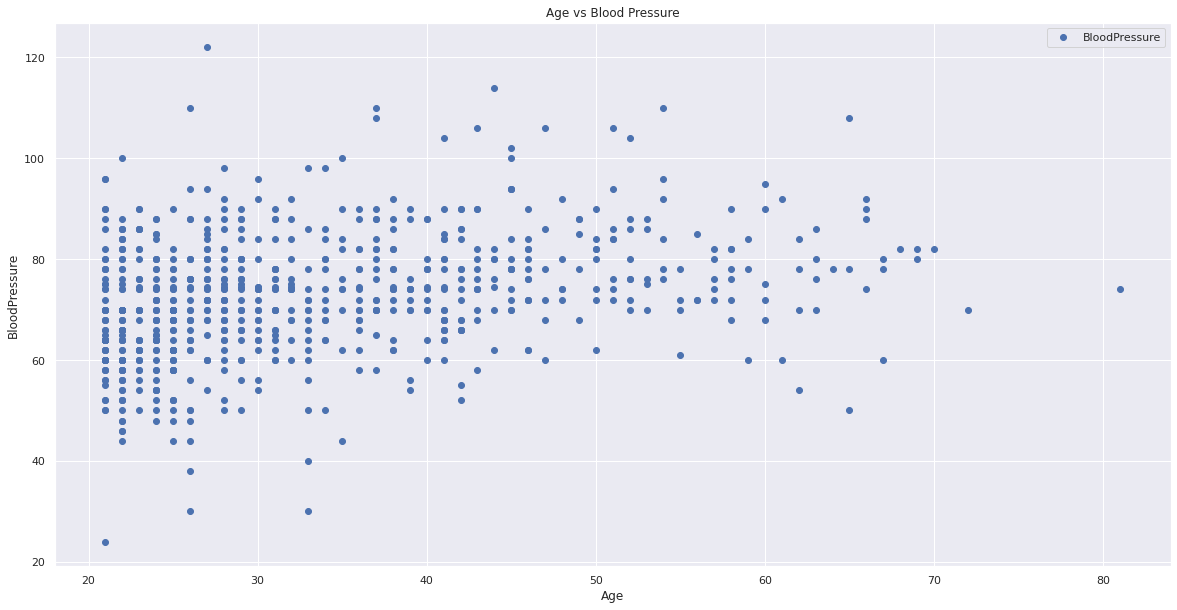

In [228]:
#Scatter Plot - Age vs Blood Pressure
joint_df.plot(x='Age', y='BloodPressure', style='o')
plt.title('Age vs Blood Pressure')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.show()

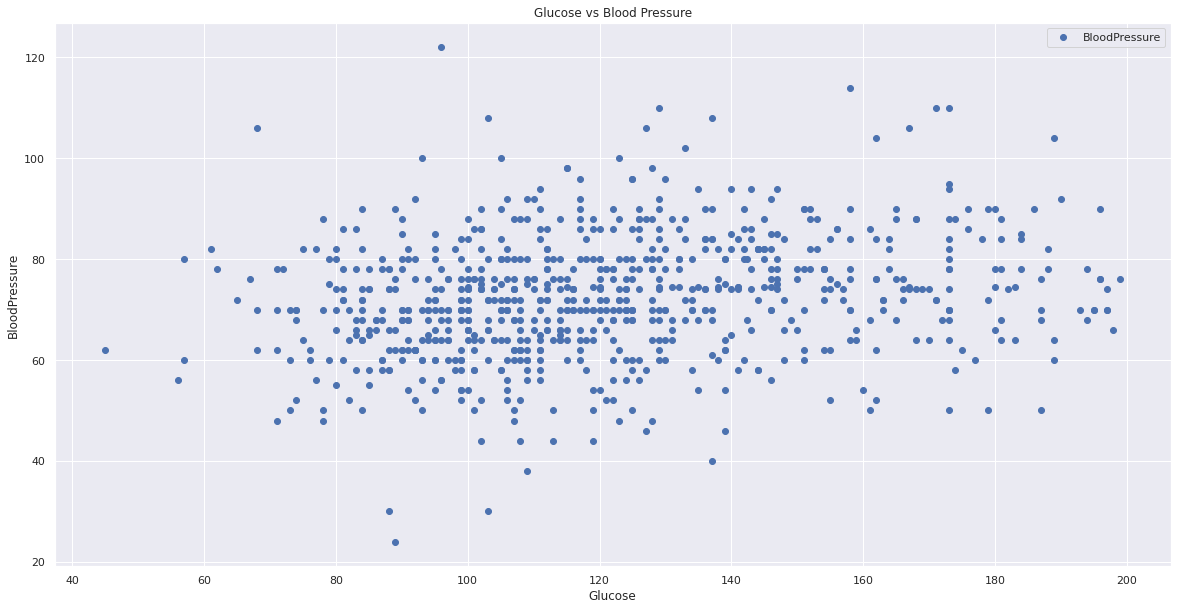

In [229]:
#Scatter Plot - Age vs Blood Pressure
joint_df.plot(x='Glucose', y='BloodPressure', style='o')
plt.title('Glucose vs Blood Pressure')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

###4.2.2 Regression Equation

In [230]:
X = joint_df[['BMI','Age', 'Glucose']]
y = joint_df['BloodPressure']

In [231]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [232]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [233]:
print(regressor.intercept_)

39.2364627320133


In [234]:
#Coefficient of each feature
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


Coefficient
BMI         0.576604
Age         0.331191
Glucose     0.024439

In [235]:
y_pred = regressor.predict(X_test)

In [236]:
df = pd.DataFrame({'Actual Blood Pressure': y_test, 'Predicted Blood Pressure': y_pred})
df

Actual Blood Pressure  Predicted Blood Pressure
419                   64.0                 66.884831
191                   70.0                 74.575726
174                   64.0                 69.123844
33                    92.0                 62.232646
66                    88.0                 73.225230
..                     ...                       ...
727                   84.0                 68.650584
736                   86.0                 65.069783
373                   58.0                 70.205844
61                    72.0                 74.373610
581                   60.0                 65.257606

[154 rows x 2 columns]

###4.2.3 Metrics

In [243]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.761341967707343
Mean Squared Error: 149.55929127636895
Root Mean Squared Error: 12.229443620883533


In [238]:
#Calculate R-squared
regressor.score(X_train,y_train)

0.22723079598067164

In [240]:
#Find the F-Statistics of the model
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     59.79
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           6.78e-34
Time:                        16:32:00   Log-Likelihood:                -2321.8
No. Observations:                 614   AIC:                             4652.
Df Residuals:                     610   BIC:                             4669.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.2365      2.678     14.649      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
